# **Word Embedding with Gensim**

The advancement of deep learning in Natural Language Processing is often attributed to the advent of word embeddings. Rather than using the words themselves as features, neural network methods typically take as input dense, relatively low-dimensional vectors that model the meaning and usage of a word.The concept of word embeddings gained prominence through models like Word2Vec, pioneered by Thomas Mikolov and his Google team. Subsequently, various other methods emerged, including GloVe and FastText embeddings. In this notebook, we'll delve into word embeddings using the original Word2Vec method, as implemented in the Gensim library.

# Training word embedding

Training word embeddings with Gensim couldn't be easier. The only thing we need is a corpus of sentences in the language under investigation.

In [1]:
!pip install gdown

In [2]:
!gdown "https://drive.google.com/uc?id=1UmvSodP7wo_L8OBu_9ImaLe5lVEVaiPX"

Downloading...
From: https://drive.google.com/uc?id=1UmvSodP7wo_L8OBu_9ImaLe5lVEVaiPX
To: /workspace/data.csv
100%|██████████████████████████████████████| 27.7M/27.7M [00:01<00:00, 23.3MB/s]


In [2]:
pip install spacy

  Using cached spacy-3.8.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.13-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.5 kB)
  Using cached preshed-3.0.10-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.4 kB)
  Using cached thinc-8.3.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached wease

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade gensim

  Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached scipy-1.13.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2━━━━━━ 0/3 [numpy]
  Attempting uninstall: scipy━━━━━━━━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: scipy 1.16.1 0/3 [numpy]
    Uninstalling scipy-1.16.1:━━━━━━━━━━━━━━ 0/3 [numpy]
      Successfully uninstalled scipy-1.16.1━ 0/3 [numpy]
   

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl (4.9 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached h5py-3.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached ml_dtypes-0.5.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached namex-0.1.0-py3-none-any.whl.

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl

In [4]:
# Import libraries
import os
import csv
import spacy
import pandas as pd
import gensim

class Corpus(object):

    def __init__(self, filename):
        self.filename = filename
        self.nlp = spacy.blank("en")

    def __iter__(self):
        with open(self.filename, "r") as i:
            reader = csv.reader(i, delimiter=",")
            # tokenise the lower cased text using spacy tokeniser
            for _, abstract in reader:
                tokens = [t.text.lower() for t in self.nlp(abstract)]
                yield tokens


documents = Corpus("data.csv")

When we train our word embeddings, gensim allows us to set a number of parameters. The most important of these are min_count, window, vector_size and sg:

* **min_count** is the minimum frequency of the words in our corpus. For infrequent
words, we just don't have enough information to train reliable word embeddings. It therefore makes sense to set this minimum frequency to at least 10. In these experiments, we'll set it to 100 to limit the size of our model even more.
window is the number of words to the left and to the right that make up the context that word2vec will take into account.

* **vector_size** is the dimensionality of the word vectors. This is generally between 100 and 1000. This dimensionality often forces us to make a trade-off: embeddings with a higher dimensionality are able to model more information, but also need more data to train.

* **sg**: there are two algorithms to train word2vec: skip-gram and CBOW. Skip-gram tries to predict the context on the basis of the target word; CBOW tries to find the target on the basis of the context. By default, Gensim uses CBOW (sg=0).


We'll investigate the impact of some of these parameters later.

In [5]:
model = gensim.models.Word2Vec(documents, min_count=100, window=5, vector_size=100)

# Using word embeddings

Let's take a look at the trained model. The word embeddings are on its wv attribute, and we can access them by the using the token as key. For example, here is the embedding for nlp, with the requested 100 dimensions.

In [3]:
model.wv["nlp"]

array([ 5.46034873e-01, -1.44900012e+00,  5.21875918e-01, -1.25214732e+00,
       -3.51383537e-01,  4.85599369e-01,  1.72848558e+00, -1.70899436e-01,
       -7.21338987e-01,  1.70870495e+00, -1.90644339e-02, -2.22368360e+00,
        8.53774607e-01, -7.30601132e-01,  4.66146976e-01,  5.44043362e-01,
        7.69802630e-02,  3.31429052e+00,  1.45853257e+00,  3.23198986e+00,
        3.52026522e-01,  5.75470507e-01, -1.80904076e-01,  1.15729427e+00,
       -2.29787588e+00, -1.13572109e+00,  1.72065377e+00,  1.04753828e+00,
        2.15621614e+00, -3.32050383e-01,  1.06820643e+00,  2.50776500e-01,
        1.74351645e+00,  2.36899734e-01,  8.71244013e-01, -1.29884577e+00,
       -3.24032813e-01, -4.58771658e+00, -1.50324419e-01,  2.28376555e+00,
       -1.96120787e+00, -1.53383029e+00,  2.84776354e+00,  5.46549261e-01,
       -1.56609845e+00, -1.11506574e-01,  1.94961751e+00,  3.31064296e+00,
       -4.91988808e-01, -2.74987149e+00,  7.52124012e-01,  1.56613302e+00,
        4.55216885e-01,  

We can also easily find the similarity between two words. Similarity is measured as the cosine between the two word embeddings, and therefore ranges between -1 and +1. The higher the cosine, the more similar two words are. As expected, the figures below show that nmt (neural machine translation) is closer to smt (statistical machine translation) than to ner (named entity recognition).

In [4]:
print(model.wv.similarity("experiments","results"))
print(model.wv.similarity("linguistics","translation"))

# More specific example
print(model.wv.similarity("nmt", "smt"))
print(model.wv.similarity("nmt", "ner"))

0.49798644
-0.014738173
0.64603966
0.39505482


In a similar vein, we can find the words that are most similar to a target word. The words with the most similar embedding to bert are all semantically related to it: other types of pretrained models such as roberta, mbert, xlm, as well as the more general model type BERT represents (transformer and transformers), and more generally related words (pretrained).

In [5]:
model.wv.similar_by_word("bert", topn=10)

[('roberta', 0.7830632328987122),
 ('transformer', 0.7617188692092896),
 ('pretrained', 0.7064928412437439),
 ('transformers', 0.7061951756477356),
 ('elmo', 0.6733844876289368),
 ('mbert', 0.6626147627830505),
 ('xlnet', 0.6607252955436707),
 ('gpt-2', 0.6353582739830017),
 ('xlm', 0.6243211030960083),
 ('lstm', 0.6098769903182983)]

In [6]:
model.wv.similar_by_word("sentences", topn=10)

[('documents', 0.7342216372489929),
 ('paraphrases', 0.7143133282661438),
 ('texts', 0.683612585067749),
 ('strings', 0.6756023168563843),
 ('keyphrases', 0.6688093543052673),
 ('tokens', 0.6664125919342041),
 ('phrases', 0.6584085822105408),
 ('passages', 0.6512041091918945),
 ('words', 0.6383274793624878),
 ('poems', 0.6086711883544922)]

Interestingly, we can look for words that are similar to a set of words and dissimilar to another set of words at the same time. This allows us to look for analogies of the type BERT is to a transformer like an LSTM is to .... Our embedding model correctly predicts that LSTMs are a type of RNN, just like BERT is a particular type of transformer.

In [7]:
model.wv.most_similar(positive=["transformer", "lstm"], negative=["bert"], topn=1)

[('rnn', 0.8273504972457886)]

Similarly, we can also zoom in on one of the meanings of ambiguous words. For example, in NLP tree has a very specific meaning, which is obvious from its nearest neighbours constituency, parse, dependency and syntax.

In [9]:
model.wv.most_similar(positive=["tree"], topn=10)

[('trees', 0.7923076152801514),
 ('constituency', 0.7024657726287842),
 ('recursive', 0.6927551627159119),
 ('parse', 0.6836045384407043),
 ('hierarchical', 0.6091218590736389),
 ('dependency', 0.608913004398346),
 ('parser', 0.6048064827919006),
 ('constituent', 0.5975824594497681),
 ('kernels', 0.5831082463264465),
 ('syntax', 0.5797215104103088)]

However, if we specify we're looking for words that are similar to tree, but dissimilar to syntax, suddenly its standard meaning takes over, and forest crops up in its nearest neighbours.

In [10]:
model.wv.most_similar(positive=["tree"], negative=["syntax"], topn=10)

[('forest', 0.4836142957210541),
 ('logistic', 0.44607484340667725),
 ('modified', 0.41506272554397583),
 ('binary', 0.4100078344345093),
 ('crf', 0.40409690141677856),
 ('feed', 0.401030570268631),
 ('random', 0.38965046405792236),
 ('bayes', 0.38783344626426697),
 ('svm', 0.38629671931266785),
 ('normalized', 0.3811650574207306)]

Finally, we can present the word2vec model with a list of words and ask it to identify the odd one out. It then uses the word embeddings to identify the word that is least similar to the other ones. For example, in the list lstm cnn gru svm transformer, it correctly identifies svm as the only non-neural model. In the list bert word2vec gpt-2 roberta xlnet, it correctly singles out word2vec as the only non-transormer model. In word2vec bert glove fasttext elmo, bert is singled out as the only transformer.

In [11]:
print(model.wv.doesnt_match("lstm cnn gru svm transformer".split()))
print(model.wv.doesnt_match("bert word2vec gpt-2 roberta xlnet".split()))
print(model.wv.doesnt_match("word2vec bert glove fasttext elmo".split()))

svm
word2vec
bert


# Exploring hyperparameters

We mentioned above there are a number of parameters we can set when training our embeddings. Let's investigate the impact some of these have on the result. Quantifying the quality of embeddings is a hard task. There exist quite a few data sets for evaluating the quality of English embeddings, but this is not the case for other languages or very specialized domains, such as NLP. Moreover, it's unclear what information good embeddings should capture. Should they model syntactic information as well as semantic knowledge? Should they capture semantic similarity, or merely topical relatedness? Often, the answer depends on the end task you want to use the embeddings for.

Here we'll use a simple method for evaluating our embeddings. We'll count how many times two nearest neighbours in the vector space have the same part of speech. After all, if our embeddings model similarity (and not just relatedness) in meaning, we expect a noun to have another noun as nearest neighbour, and the same for verbs, adjectives, and so on.

First we'll use spaCy to determine the part of speech of all the words in our vocabulary. Note that our evaluation metric does rely on the quality of spaCy's part-of-speech tagging, which may not be very accurate for low-frequency words out of context. Nevertheless, we'll assume it's good enough for our purposes.

In [1]:
import spacy
# Get spaCy's installation path
spacy_path = spacy.__file__
print(f"SpaCy installation path: {spacy_path}")

SpaCy installation path: /venv/main/lib/python3.12/site-packages/spacy/__init__.py


In [6]:
import spacy
from tqdm.notebook import tqdm

nlp = spacy.load("en_core_web_sm")

word2pos = {}
for word in tqdm(model.wv.key_to_index):
    word2pos[word] = nlp(word)[0].pos_

word2pos["translation"]

  0%|          | 0/3099 [00:00<?, ?it/s]

'NOUN'


Then we write a simple method that takes a model and looks up the nearest neighbour to every word in its vocabulary. It returns the number of times this nearest neighbour has the same part of speech: a percentage we'll call the accuracy.

In [7]:
import numpy as np

def evaluate(model, word2pos):
    same = 0
    for word in tqdm(model.wv.key_to_index):
        most_similar = model.wv.similar_by_word(word, topn=1)[0][0]
        if word2pos[most_similar] == word2pos[word]:
            same += 1
    return same/len(model.wv.key_to_index)

evaluate(model, word2pos)

  0%|          | 0/3099 [00:00<?, ?it/s]

0.6505324298160697

Now we vary some of the settings we introduced above. In particular we're interested in the influence of embedding size (the dimensionality of the trained embeddings), and the size of the context window. We vary the embedding size between 100, 200 and 300,and the context window between 2, 5 and 10. This means we'll train 9 models in total, which obviously takes a bit of time. Feel free to go grab a coffee.

In [8]:
sizes = [100, 200, 300]
windows = [2,5,10]

df = pd.DataFrame(index=windows, columns=sizes)

for size in sizes:
    for window in windows:
        print("Size:", size, "Window:", window)
        model = gensim.models.Word2Vec(documents, min_count=100, window=window, vector_size=size)
        acc = evaluate(model, word2pos)
        df[size][window] = acc

df

Size: 100 Window: 2


  0%|          | 0/3099 [00:00<?, ?it/s]

/tmp/ipykernel_3833/2963030588.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[size][window] = acc


Size: 100 Window: 5


  0%|          | 0/3099 [00:00<?, ?it/s]

Size: 100 Window: 10


  0%|          | 0/3099 [00:00<?, ?it/s]

Size: 200 Window: 2


  0%|          | 0/3099 [00:00<?, ?it/s]

Size: 200 Window: 5


  0%|          | 0/3099 [00:00<?, ?it/s]

Size: 200 Window: 10


  0%|          | 0/3099 [00:00<?, ?it/s]

Size: 300 Window: 2


  0%|          | 0/3099 [00:00<?, ?it/s]

Size: 300 Window: 5


  0%|          | 0/3099 [00:00<?, ?it/s]

Size: 300 Window: 10


  0%|          | 0/3099 [00:00<?, ?it/s]

,100,200,300
2,0.675056,0.676993,0.683124
5,0.658922,0.646338,0.650855
10,0.621168,0.617296,0.61536


Although the accuracies of all models are very similar, the results do show some interesting patterns.

First, it looks like smaller contexts work better than larger ones. This is logical, as our evaluation metric is a syntactic one: the closest context words contain much more useful information about the part of speech of a word than those further away.

Second, higher-dimensional word embeddings do not necessarily work better than lower-dimensional ones. This may sound counter-intuitive, as higher-dimensional embeddings are able to capture more information. Still, larger embeddings also require more data, while we're using a pretty small corpus.

<Axes: >

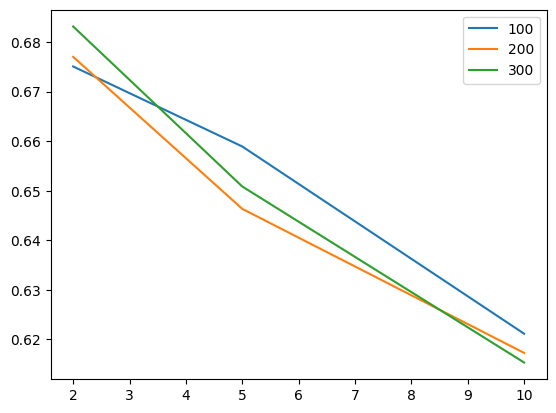

In [9]:
df.plot()

# Conclusions

Word embeddings are one of the most exciting trends on Natural Language Processing since the 2000s. They allow us to model the meaning and usage of a word, and discover words that behave similarly. This is crucial for the generalization capacity of many machine learning models. Moving from raw strings to embeddings allows them to generalize across words that have a similar meaning, and discover patterns that had previously escaped them.

### **Simple Task for you**
Download a pretrained word2vec wordembedding and perform above similarity checks and evaluate and compare your results.

In [ ]:
# Your code goes here

# ***LSTM & CNN for classification***
This part describes how to implement LSTM models for text binary classification using tensorflow and keras.

In [10]:
import random
from datasets import load_dataset
from sklearn.model_selection import train_test_split

RANDOM_SEED = 500
VALIDATION_SIZE = 0.2

imdb = load_dataset("imdb")

# Method 1: Convert to pandas first (recommended)
df_train = imdb['train'].to_pandas()

# Split the data
train_split, validation_split = train_test_split(
    df_train, 
    test_size=VALIDATION_SIZE, 
    random_state=RANDOM_SEED
)

# Extract as lists
train_txt = train_split['text'].tolist()
train_lbl = train_split['label'].tolist()
validation_txt = validation_split['text'].tolist()
validation_lbl = validation_split['label'].tolist()

test_txt = imdb['test']['text']
test_lbl = imdb['test']['label']

print(f"Training samples: {len(train_txt)}")
print(f"Validation samples: {len(validation_txt)}")

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Training samples: 20000
Validation samples: 5000


## Vectorise the dataset and build the vocabulary

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization

MAX_LENGTH = 300
MAX_VOCAB_SIZE = 20000
BATCH_SIZE = 128

# Now create TensorFlow dataset
text_ds = tf.data.Dataset.from_tensor_slices(train_txt).batch(BATCH_SIZE)

# Continue with your vectorizer
vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=MAX_VOCAB_SIZE, 
    output_sequence_length=MAX_LENGTH
)
vectorizer.adapt(text_ds)

print("Vectorizer adapted successfully!")

2025-09-03 09:32:03.274224: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1756891924.816733    3833 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15442 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:02:00.0, compute capability: 8.9


Vectorizer adapted successfully!


2025-09-03 09:32:06.014302: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'the', 'and', 'a']

In [13]:
output = vectorizer([["You are welcome to the RANLP conference"]])
output.numpy()[0, :8]

array([   23,    24,  2368,     6,     2,     1, 14907,     0])

## Download embeddings

In [14]:
!gdown "https://drive.google.com/uc?id=12tAq-AbroB9hHwi597lIyjktr3o62w8o"

Downloading...
From (original): https://drive.google.com/uc?id=12tAq-AbroB9hHwi597lIyjktr3o62w8o
From (redirected): https://drive.google.com/uc?id=12tAq-AbroB9hHwi597lIyjktr3o62w8o&confirm=t&uuid=d64d05ee-3cfe-402e-830d-828c60b08ae5
To: /workspace/glove.6B.100d.txt
100%|████████████████████████████████████████| 347M/347M [00:12<00:00, 27.4MB/s]


In [ ]:
# !wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
# !unzip -q glove.6B.zip
# !ls

## Create word index and embeddings index

In [15]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

path_to_glove_file = 'glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


## Build embeddings matrix

In [16]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 18715 words (1285 misses)


## Create LSTM model

In [17]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers

NUM_CLASSES = 2

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    name='embeddings'
)
input = tf.keras.Input(shape=(None,), dtype="int64", name="input")
x = embedding_layer(input)
x = layers.LSTM(128, name="lstm_1",return_sequences=True)(x)
x = layers.LSTM(128, name="lstm_2")(x)
output = layers.Dense(NUM_CLASSES, activation="softmax", name="dense_predictions")(x)
model = keras.Model(inputs=input, outputs=output, name="lstm_model")
model.summary()

Model: "lstm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeddings (Embedding)          │ (None, None, 100)      │     2,000,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 128)      │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_predictions (Dense)       │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,249,290 (8.58 MB)

 Trainable params: 249,090 (973.01 KB)

 Non-trainable params: 2,000,200 (7.63 MB)

## Train Model

In [18]:
x_train = vectorizer(np.array([[s] for s in train_txt])).numpy()
x_val = vectorizer(np.array([[s] for s in validation_txt])).numpy()

y_train = np.array(train_lbl)
y_val = np.array(validation_lbl)

LEARNING_RATE = 0.01
optimiser = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
# optimiser = keras.optimizers.SGD(learning_rate=LEARNING_RATE)
# optimiser = keras.optimizers.RMSprop(learning_rate=LEARNING_RATE)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimiser, metrics=["accuracy"],
)
model.fit(x_train, y_train, batch_size=256, epochs=3, validation_data=(x_val, y_val))

x_test = vectorizer(np.array([[s] for s in test_txt])).numpy()
y_test = np.array(test_lbl)
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3


2025-09-03 09:33:21.638403: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90501


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5136 - loss: 0.7052 - val_accuracy: 0.5382 - val_loss: 0.6833
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5205 - loss: 0.6884 - val_accuracy: 0.5474 - val_loss: 0.6841
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5865 - loss: 0.6598 - val_accuracy: 0.5158 - val_loss: 0.7095
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5016 - loss: 0.7190
Accuracy: 50.16%


## Early Stopping

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,min_delta=0.001)
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val),callbacks=[callback])

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5450 - loss: 0.6874 - val_accuracy: 0.6128 - val_loss: 0.6830
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5910 - loss: 0.6674 - val_accuracy: 0.6168 - val_loss: 0.6540
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6061 - loss: 0.6599 - val_accuracy: 0.6228 - val_loss: 0.6513
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6102 - loss: 0.6570 - val_accuracy: 0.6240 - val_loss: 0.6512
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6108 - loss: 0.6547 - val_accuracy: 0.6276 - val_loss: 0.6500


## Inferencing

In [20]:
string_input = keras.Input(shape=(1,), dtype="string", name="text_input")
x = vectorizer(string_input)
preds = model(x)
end_to_end_model = keras.Model(string_input, preds)

sample_text = tf.constant(["I like this movie"], dtype=tf.string)

probabilities = end_to_end_model.predict(sample_text)
print("Probabilities:", probabilities)
print("Predicted class:", np.argmax(probabilities[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Probabilities: [[0.69670373 0.30329627]]
Predicted class: 0


# Bi-LSTM

Change the above model to a Bi-LSTM model

In [ ]:
# Your code goes here